In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './data_folder/train.p'
testing_file = './data_folder/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
#slice off the validation set from the training set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size= 0.2, random_state = 0)

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 27839
Number of testing examples = 12630
Number of validation examples = 6960
Image data shape = (32, 32, 3)
Number of classes = 43


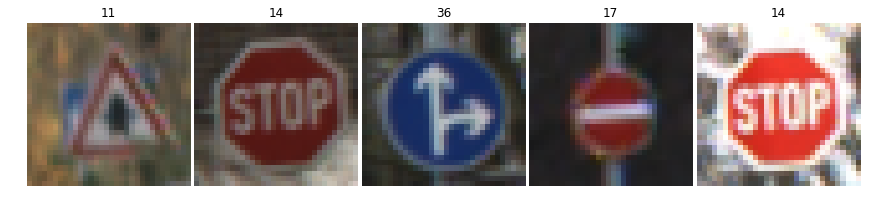

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 5 random training images
fig, ax = plt.subplots(1,5, figsize=(15, 3))
fig.subplots_adjust(hspace = 0.2, wspace = 0.001)
ax.ravel()

for i in range(5):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    ax[i].axis('off')
    ax[i].imshow(image)
    ax[i].set_title(y_train[index])
    


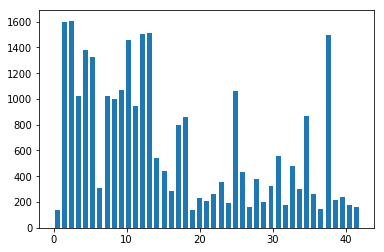

In [5]:
# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

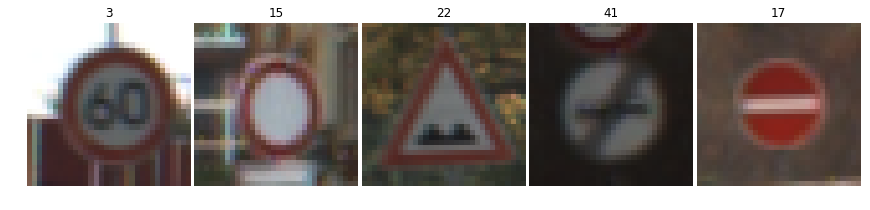

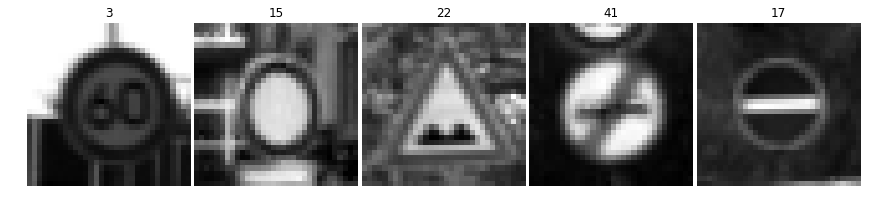

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import copy

def preprocess (X_train):
    
    #Convert to grayscale, e.g. single Y channel
    X_train_prep = np.sum(X_train/3, axis=3, keepdims=True)

    #Scale features to be in [-1, 1]
    #X_train_prep = ((X_train_prep-128.) / 128.).astype(np.float32)
    X_train_prep = ((X_train_prep-X_train_prep.mean()) / (np.max(X_train_prep) - np.min(X_train_prep))).astype(np.float32)
    
    return X_train_prep


# show image of 5 random preprocessed training images
fig1, ax1 = plt.subplots(1,5, figsize=(15, 3))
fig1.subplots_adjust(hspace = 0.2, wspace = 0.001)
ax1.ravel()

for i in range(5):
    index = i
    image = X_train[index]
    ax1[i].axis('off')
    ax1[i].imshow(image)
    ax1[i].set_title(y_train[index])
    
    
#Preprocess the training dataset 
X_train = preprocess(X_train)

X_valid = preprocess (X_valid)

X_test = preprocess(X_test)


# show image of 5 random preprocessed training images
fig, ax = plt.subplots(1,5, figsize=(15, 3))
fig.subplots_adjust(hspace = 0.2, wspace = 0.001)
ax.ravel()

for i in range(5):
    index = i
    image = X_train[index].squeeze()
    ax[i].axis('off')
    ax[i].imshow(image, cmap = 'gray')
    ax[i].set_title(y_train[index])
    
    

In [7]:
#shuffle train data to prevent any correlations
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [8]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 32

C:\Users\mahssalem\Anaconda3\envs\myEnv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
from tensorflow.contrib.layers import flatten

#original
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape =(5,5,1,6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros((6)))
    
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding = 'VALID') + conv1_b
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,1,1,1], padding = 'VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding= 'VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape = (400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    
    fc1 = tf.add(tf.matmul(fc0, fc1_w), fc1_b)
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    
    fc2 = tf.add(tf.matmul(fc1, fc2_w),fc2_b)
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape = (84,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43)) 
    
    fc3 = tf.add(tf.matmul(fc2, fc3_w),fc3_b)
    
    logits = fc3
    
    return logits

In [10]:
from tensorflow.contrib.layers import flatten

#Sermanet/ LeCun
def model(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape =(5,5,1,6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros((6)))
    
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding = 'VALID') + conv1_b
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,1,1,1], padding = 'VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding= 'VALID')
    
    conv2 = tf.nn.dropout(conv2, keep_prob)
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    conv3_w = tf.Variable(tf.truncated_normal(shape=(5,5,16,400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    
    conv3 = tf.nn.conv2d(conv2, conv3_w, strides=[1,1,1,1], padding = 'VALID') + conv3_b
    
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    conv2_flatten = flatten(conv2)
    print("conv2_flatten shape:",conv2_flatten.get_shape())
    
    # TODO: Flatten. Input = 1x1x400. Output = 400.
    conv3_flatten = flatten(conv3)
    print("conv3_flatten shape:",conv3_flatten.get_shape())
    
    # Concat conv2_flatten and conv3_flatten. Input = 400 + 400. Output = 800
    fc0 = tf.concat([conv3_flatten, conv2_flatten], 1)
    print("fc0 shape:",fc0.get_shape())
    
    fc0 = tf.nn.dropout(fc0, keep_prob)
    # TODO: Layer 3: Fully Connected. Input = 800. Output = 43.
    fc1_w = tf.Variable(tf.truncated_normal(shape = (800, 43), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(43))
    
    fc1 = tf.add(tf.matmul(fc0, fc1_w), fc1_b)
    
    
    logits = fc1
    
    return logits

In [11]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [12]:
rate = 0.0009

logits = model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

conv2_flatten shape: (?, 400)
conv3_flatten shape: (?, 400)
fc0 shape: (?, 800)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.864

EPOCH 2 ...
Validation Accuracy = 0.933

EPOCH 3 ...
Validation Accuracy = 0.959

EPOCH 4 ...
Validation Accuracy = 0.969

EPOCH 5 ...
Validation Accuracy = 0.975

EPOCH 6 ...
Validation Accuracy = 0.981

EPOCH 7 ...
Validation Accuracy = 0.981

EPOCH 8 ...
Validation Accuracy = 0.985

EPOCH 9 ...
Validation Accuracy = 0.988

EPOCH 10 ...
Validation Accuracy = 0.990

Model saved


In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.936
